In [9]:
# Importing libraries
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Method definition for EarthQuake API
def earthquake(f):
    paramss = {"format": "geojson", "starttime": "2001-01-01", "endtime": "2023-12-31", "alertlevel": "orange"}    
    data = requests.get(f, params = paramss) 
    json = data.json()   
    return json


In [11]:
# Method to calling EarthQuake API
f = r"https://earthquake.usgs.gov/fdsnws/event/1/query?"
a = earthquake(f)

features = (a['features'])
print((features))



[{'type': 'Feature', 'properties': {'mag': 5.6, 'place': '13 km SW of Khowy, Iran', 'time': 1679627816125, 'updated': 1685138055040, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000jmbi', 'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us7000jmbi&format=geojson', 'felt': 54, 'cdi': 6.1, 'mmi': 7.878, 'alert': 'orange', 'status': 'reviewed', 'tsunami': 0, 'sig': 1033, 'net': 'us', 'code': '7000jmbi', 'ids': ',us7000jmbi,usauto7000jmbi,pt23083051,', 'sources': ',us,usauto,pt,', 'types': ',dyfi,ground-failure,groundmotion-packet,impact-text,internal-moment-tensor,internal-origin,losspager,moment-tensor,origin,phase-data,shakemap,', 'nst': 101, 'dmin': 1.179, 'rms': 0.92, 'gap': 40, 'magType': 'mww', 'type': 'earthquake', 'title': 'M 5.6 - 13 km SW of Khowy, Iran'}, 'geometry': {'type': 'Point', 'coordinates': [44.8505, 38.4614, 11]}, 'id': 'us7000jmbi'}, {'type': 'Feature', 'properties': {'mag': 6.4, 'place': '15km WSW of Ferndale, CA', 'tim

In [12]:
#Adding Column names and record to DataSet and Split coordinates to Lattitude,Longitude and Depth
data = []
for new_row in (a["features"]):    
    coordinates = new_row["geometry"]["coordinates"]    
    data.append({
        'mag': new_row["properties"]["mag"],
        'place': new_row["properties"]["place"].split(','),
        'time': new_row["properties"]["time"],
        'cdi': new_row["properties"]["cdi"],
        'mmi': new_row["properties"]["mmi"],
        'alert': new_row["properties"]["alert"],
        'status': new_row["properties"]["status"],
        'tsunami': new_row["properties"]["tsunami"],
        'sig': new_row["properties"]["sig"],
        'code': new_row["properties"]["code"],
        'ids': new_row["properties"]["ids"],
        'time': new_row["properties"]["time"],
        'magType': new_row["properties"]["magType"],
        'title': new_row["properties"]["title"],
        'time': new_row["properties"]["time"],
        'coordinates': new_row["geometry"]["coordinates"],
        'lattitude': coordinates[0],
        'longitude': coordinates[1],
        'depth': coordinates[2],
    })

df = pd.DataFrame(data)
 

In [37]:
# Split the Place column and made 2 colums like Location and Country
 df[['Location', 'Country']] = df['place'].str.split(',', expand=True)


In [38]:
df

,mag,place,time,cdi,mmi,alert,status,tsunami,sig,code,ids,magType,title,coordinates,lattitude,longitude,depth,Location,Country
0,5.6,"13 km SW of Khowy, Iran",1679627816125,6.1,7.878,orange,reviewed,0,1033,7000jmbi,",us7000jmbi,usauto7000jmbi,pt23083051,",mww,"M 5.6 - 13 km SW of Khowy, Iran","[44.8505, 38.4614, 11]",44.8505,38.4614,11.00,13 km SW of Khowy,Iran
1,6.4,"15km WSW of Ferndale, CA",1671532464770,7.8,7.766,orange,reviewed,1,1780,73821036,",ew1671532470,nc73821036,us6000jahm,at00rn6qpb...",mw,"M 6.4 - 15km WSW of Ferndale, CA","[-124.423, 40.525, 17.91]",-124.4230,40.5250,17.91,15km WSW of Ferndale,CA
2,6.1,"15 km W of Düzce, Turkey",1669165695435,7.6,7.942,orange,reviewed,0,1760,7000irp8,",us7000irp8,usauto7000irp8,at00rls0hs,pt22327000,",mww,"M 6.1 - 15 km W of Düzce, Turkey","[30.9831, 40.8356, 10]",30.9831,40.8356,10.00,15 km W of Düzce,Turkey
3,5.6,"11 km NE of Sukabumi, Indonesia",1669011667066,8.4,8.471,orange,reviewed,0,1134,7000ir9t,",us7000ir9t,usauto7000ir9t,pt22325000,",mww,"M 5.6 - 11 km NE of Sukabumi, Indonesia","[106.9968, -6.836, 10]",106.9968,-6.8360,10.00,11 km NE of Sukabumi,Indonesia
4,5.6,"8 km SE of Khowy, Iran",1664929289702,7.2,6.927,orange,reviewed,0,1035,6000iqx6,",us6000iqx6,usauto6000iqx6,pt22278000,",mww,"M 5.6 - 8 km SE of Khowy, Iran","[45.0259, 38.5064, 15]",45.0259,38.5064,15.00,8 km SE of Khowy,Iran
5,6.6,"44 km SE of Kangding, China",1662353539645,8.9,8.019,orange,reviewed,0,1043,7000i59t,",us7000i59t,usauto7000i59t,at00rhq07d,pt22248000,",mww,"M 6.6 - 44 km SE of Kangding, China","[102.236, 29.6786, 12]",102.2360,29.6786,12.00,44 km SE of Kangding,China
6,6.0,"55 km SW of Kh?st, Afghanistan",1655844874410,8.7,8.153,orange,reviewed,0,1074,7000hj3u,",us7000hj3u,usauto7000hj3u,pt22172002,at00rdui34,",mww,"M 6.0 - 55 km SW of Kh?st, Afghanistan","[69.4639, 33.0203, 4]",69.4639,33.0203,4.00,55 km SW of Kh?st,Afghanistan
7,6.6,"northern Qinghai, China",1641577530809,8.5,8.434,orange,reviewed,0,1012,7000g9zq,",us7000g9zq,usauto7000g9zq,at00r5cpbx,pt22007000,",mww,"M 6.6 - northern Qinghai, China","[101.29, 37.8283, 13]",101.2900,37.8283,13.00,northern Qinghai,China
8,7.3,"Southern Qinghai, China",1621620253565,9.1,9.115,orange,reviewed,0,1025,7000e54r,",us7000e54r,usauto7000e54r,pt21141001,at00qtgy75,",mww,"M 7.3 - Southern Qinghai, China","[98.2513, 34.5983, 10]",98.2513,34.5983,10.00,Southern Qinghai,China
9,6.1,"25 km NW of Dali, China",1621604917193,7.9,8.456,orange,reviewed,0,1017,7000e532,",us7000e532,usauto7000e532,pt21141000,at00qtgmd3,",mww,"M 6.1 - 25 km NW of Dali, China","[100.0082, 25.7274, 9]",100.0082,25.7274,9.00,25 km NW of Dali,China


In [39]:
df

,mag,place,time,cdi,mmi,alert,status,tsunami,sig,code,ids,magType,title,coordinates,lattitude,longitude,depth,Location,Country
0,5.6,"13 km SW of Khowy, Iran",1679627816125,6.1,7.878,orange,reviewed,0,1033,7000jmbi,",us7000jmbi,usauto7000jmbi,pt23083051,",mww,"M 5.6 - 13 km SW of Khowy, Iran","[44.8505, 38.4614, 11]",44.8505,38.4614,11.00,13 km SW of Khowy,Iran
1,6.4,"15km WSW of Ferndale, CA",1671532464770,7.8,7.766,orange,reviewed,1,1780,73821036,",ew1671532470,nc73821036,us6000jahm,at00rn6qpb...",mw,"M 6.4 - 15km WSW of Ferndale, CA","[-124.423, 40.525, 17.91]",-124.4230,40.5250,17.91,15km WSW of Ferndale,CA
2,6.1,"15 km W of Düzce, Turkey",1669165695435,7.6,7.942,orange,reviewed,0,1760,7000irp8,",us7000irp8,usauto7000irp8,at00rls0hs,pt22327000,",mww,"M 6.1 - 15 km W of Düzce, Turkey","[30.9831, 40.8356, 10]",30.9831,40.8356,10.00,15 km W of Düzce,Turkey
3,5.6,"11 km NE of Sukabumi, Indonesia",1669011667066,8.4,8.471,orange,reviewed,0,1134,7000ir9t,",us7000ir9t,usauto7000ir9t,pt22325000,",mww,"M 5.6 - 11 km NE of Sukabumi, Indonesia","[106.9968, -6.836, 10]",106.9968,-6.8360,10.00,11 km NE of Sukabumi,Indonesia
4,5.6,"8 km SE of Khowy, Iran",1664929289702,7.2,6.927,orange,reviewed,0,1035,6000iqx6,",us6000iqx6,usauto6000iqx6,pt22278000,",mww,"M 5.6 - 8 km SE of Khowy, Iran","[45.0259, 38.5064, 15]",45.0259,38.5064,15.00,8 km SE of Khowy,Iran
5,6.6,"44 km SE of Kangding, China",1662353539645,8.9,8.019,orange,reviewed,0,1043,7000i59t,",us7000i59t,usauto7000i59t,at00rhq07d,pt22248000,",mww,"M 6.6 - 44 km SE of Kangding, China","[102.236, 29.6786, 12]",102.2360,29.6786,12.00,44 km SE of Kangding,China
6,6.0,"55 km SW of Kh?st, Afghanistan",1655844874410,8.7,8.153,orange,reviewed,0,1074,7000hj3u,",us7000hj3u,usauto7000hj3u,pt22172002,at00rdui34,",mww,"M 6.0 - 55 km SW of Kh?st, Afghanistan","[69.4639, 33.0203, 4]",69.4639,33.0203,4.00,55 km SW of Kh?st,Afghanistan
7,6.6,"northern Qinghai, China",1641577530809,8.5,8.434,orange,reviewed,0,1012,7000g9zq,",us7000g9zq,usauto7000g9zq,at00r5cpbx,pt22007000,",mww,"M 6.6 - northern Qinghai, China","[101.29, 37.8283, 13]",101.2900,37.8283,13.00,northern Qinghai,China
8,7.3,"Southern Qinghai, China",1621620253565,9.1,9.115,orange,reviewed,0,1025,7000e54r,",us7000e54r,usauto7000e54r,pt21141001,at00qtgy75,",mww,"M 7.3 - Southern Qinghai, China","[98.2513, 34.5983, 10]",98.2513,34.5983,10.00,Southern Qinghai,China
9,6.1,"25 km NW of Dali, China",1621604917193,7.9,8.456,orange,reviewed,0,1017,7000e532,",us7000e532,usauto7000e532,pt21141000,at00qtgmd3,",mww,"M 6.1 - 25 km NW of Dali, China","[100.0082, 25.7274, 9]",100.0082,25.7274,9.00,25 km NW of Dali,China


<Figure size 1000x600 with 0 Axes>

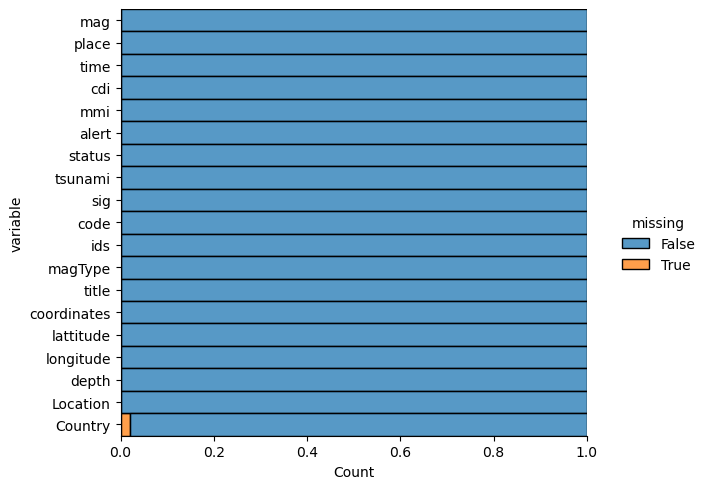

In [40]:
#Visualizing Dataset Without Cleaning
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

#No traces of missing data

In [42]:
df.shape
df.dtypes



mag            float64
place           object
time             int64
cdi            float64
mmi            float64
alert           object
status          object
tsunami          int64
sig              int64
code            object
ids             object
magType         object
title           object
coordinates     object
lattitude      float64
longitude      float64
depth          float64
Location        object
Country         object
dtype: object

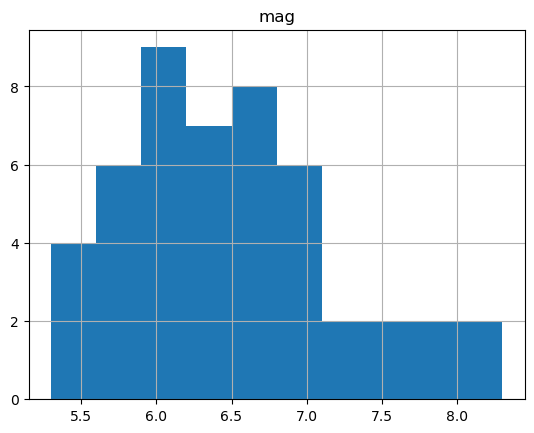

In [43]:
##Plotting Histogram


fig = df.hist(column='mag')

##Though the outliers are plotted for depth caused by earth quake this can be real data or bad data no clue of how to determine it ,I am just ignoring 
#the data for now.

In [44]:
df.to_csv('cleaneddata_from_api.csv')

In [ ]:
Steps involved :
# Importing the required libraries
# calling EarthQuake api
# Queried the subset with Query Params
# Build the data
# Defining of the dataframe
# Replace Headers as needed.
# Format data into a more readable format
# Location column in website is formatted to Country and location as seperate columns
# Transformation done on Magnitude Column having range values to average for e.g 7.5–7.7 to 7.6
# Transforming Number of people died in each eventin new column called Deaths
# Split the Place column and made 2 colums like Location and Country
# Visualizing Dataset Without Cleaning - No Missing data
#To check for Duplicates 
##Plotting Histogram to check outliers.

In [ ]:
In this scenario, the ethical implications are greatly important mainly due to the high number of people affected. 
For example, if data wrangling does not occur, this can lead to the raw data not being used in the imtemded way, 
thus leading to innacurate building reinforcements and earthquake simulations. These inconsistencies can result in 
misconstrued errors and a high number of fatalities if executed improperly due to using raw data.
Overall, data wrangling is necessary so that professionals can use the data they garner in a way that they can effectively 
use and positively impact others, instead of harming them. 
    . A strong earthquake immediately changes surprised feelings into shock and desperation. 
    A positive approach should comprise the following: 
        (1) a better knowledge of seismicity, 
        (2) constant awareness of seismic activity, 
        (3) an understanding of the meaning of the probability applied to seismicity and 
        (4) a movement towards positive activities such as building reinforcements and earthquake simulation activities.
Social and ethical implications need to find an equilibrium point between alarmism and the undervaluation of the hazard.